In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_1samp

In [4]:
df = pd.read_csv('1617.csv')
df = df[df['isMainSleep'] == 1]
df['week_start'] = pd.to_datetime(df['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [5]:
eff = df[['participID', 'dataDate', 'efficiency', 'week_start']]
eff


,participID,dataDate,efficiency,week_start
0,3LZGLG,2016-08-23,98,2016-08-22
2,3LZGLG,2016-08-24,98,2016-08-22
3,3LZGLG,2016-08-25,96,2016-08-22
5,3LZGLG,2016-08-26,97,2016-08-22
6,3LZGLG,2016-08-27,99,2016-08-22
...,...,...,...,...
47786,5FHZX5,2017-03-28,88,2017-03-27
47788,5FHZX5,2017-04-18,90,2017-04-17
47789,5FHZX5,2017-04-19,94,2017-04-17
47790,5FHZX5,2017-04-20,88,2017-04-17


In [6]:
eff = eff.groupby(['participID', 'week_start'], as_index=False).mean()
eff.head()

,participID,week_start,efficiency
0,3LZGLG,2016-08-22,97.600000
1,3LZGLG,2016-08-29,92.571429
2,3LZGLG,2016-09-05,93.428571
3,3LZGLG,2016-09-12,94.857143
4,3LZGLG,2016-09-19,95.285714


In [7]:
pivot = eff.pivot(index='participID', columns='week_start', values='efficiency')
pivot.head()

week_start,2016-08-22,2016-08-29,2016-09-05,2016-09-12,2016-09-19,2016-09-26,2016-10-03,2016-10-10,2016-10-17,2016-10-24,...,2017-03-06,2017-03-13,2017-03-20,2017-03-27,2017-04-03,2017-04-10,2017-04-17,2017-04-24,2017-05-01,2017-05-08
participID,,,,,,,,,,,,,,,,,,,,,
3LZGLG,97.600000,92.571429,93.428571,94.857143,95.285714,96.428571,94.571429,93.857143,96.428571,95.833333,...,95.142857,94.000000,93.333333,94.000000,93.000000,91.857143,91.428571,90.166667,90.800000,92.25
3LZJFK,93.500000,93.000000,95.333333,94.714286,92.714286,93.500000,96.000000,94.714286,94.000000,92.666667,...,93.571429,89.666667,93.500000,89.833333,92.714286,94.333333,96.200000,95.000000,95.142857,94.20
3LZRZQ,93.666667,95.428571,95.285714,94.714286,95.571429,96.142857,95.000000,95.428571,96.000000,95.166667,...,NaN,98.000000,NaN,93.500000,95.500000,96.000000,96.000000,97.000000,NaN,NaN
3M29ZH,96.200000,97.500000,97.000000,97.000000,98.500000,96.000000,97.000000,97.000000,97.750000,96.500000,...,97.500000,NaN,98.000000,97.833333,96.800000,97.750000,98.333333,98.200000,98.800000,98.60
3M2QNS,94.000000,96.000000,93.285714,93.714286,94.000000,93.000000,95.400000,93.500000,NaN,93.200000,...,96.000000,93.833333,91.833333,93.400000,89.750000,90.800000,94.833333,94.666667,96.000000,94.25


In [8]:
pivot_drop = pivot.dropna()
#68 participants who had at least one night of data from all 37 weeks 

In [9]:
pdrop= pivot_drop[(np.abs(stats.zscore(pivot_drop)) < 3).all(axis=1)]

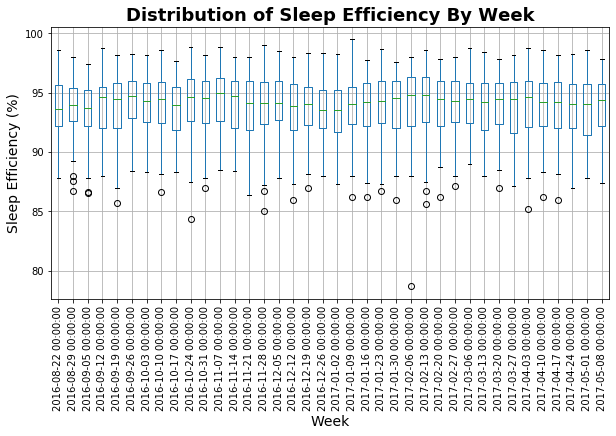

In [10]:
pdrop.boxplot(figsize=(10,5))
plt.xticks(rotation=90);
plt.title('Distribution of Sleep Efficiency By Week', fontsize=18, fontweight='bold');
plt.ylabel('Sleep Efficiency (%)', fontsize=14);
plt.xlabel('Week', fontsize=14);

In [11]:
def paired_t_test(before, after):
    ttest,pval = stats.ttest_rel(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    #else:
    #    print("accept null hypothesis")

In [12]:
pd_flat = pdrop.reset_index()

In [13]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        paired_t_test(this_week, next_week)

2016-08-29 00:00:00
2016-09-05 00:00:00
reject null hypothesis
2016-09-12 00:00:00
reject null hypothesis
2016-09-19 00:00:00
2016-09-26 00:00:00
reject null hypothesis
2016-10-03 00:00:00
2016-10-10 00:00:00
2016-10-17 00:00:00
reject null hypothesis
2016-10-24 00:00:00
reject null hypothesis
2016-10-31 00:00:00
2016-11-07 00:00:00
reject null hypothesis
2016-11-14 00:00:00
reject null hypothesis
2016-11-21 00:00:00
2016-11-28 00:00:00
2016-12-05 00:00:00
2016-12-12 00:00:00
2016-12-19 00:00:00
2016-12-26 00:00:00
2017-01-02 00:00:00
2017-01-09 00:00:00
2017-01-16 00:00:00
2017-01-23 00:00:00
2017-01-30 00:00:00
2017-02-06 00:00:00
2017-02-13 00:00:00
2017-02-20 00:00:00
2017-02-27 00:00:00
2017-03-06 00:00:00
2017-03-13 00:00:00
2017-03-20 00:00:00
2017-03-27 00:00:00
2017-04-03 00:00:00
2017-04-10 00:00:00
2017-04-17 00:00:00
2017-04-24 00:00:00
2017-05-01 00:00:00
2017-05-08 00:00:00


In [14]:
# checking normality: is paired t test the right thing to be doing?

In [15]:
def check_normal(before, after):
    diff = before - after
    diff.plot(kind='hist', title= 'Efficiency Difference')
    plt.show()

In [16]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
       # print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
       # check_normal(this_week, next_week)

## Wilcoxon Signed Rank Test
### No assumptions about normality

In [17]:
def wilcoxon_t_test(before, after, pvals):
    ttest,pval = stats.wilcoxon(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    pvals.append(pval)
    #else:
    #    print("accept null hypothesis")stats.wilcoxon(df['bp_before'], df['bp_after'])

In [18]:
weeks = pdrop.columns
pvals = []
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        wilcoxon_t_test(this_week, next_week, pvals)

2016-08-29 00:00:00
2016-09-05 00:00:00
reject null hypothesis
2016-09-12 00:00:00
reject null hypothesis
2016-09-19 00:00:00
2016-09-26 00:00:00
reject null hypothesis
2016-10-03 00:00:00
2016-10-10 00:00:00
2016-10-17 00:00:00
reject null hypothesis
2016-10-24 00:00:00
reject null hypothesis
2016-10-31 00:00:00
2016-11-07 00:00:00
reject null hypothesis
2016-11-14 00:00:00
reject null hypothesis
2016-11-21 00:00:00
2016-11-28 00:00:00
2016-12-05 00:00:00
2016-12-12 00:00:00
2016-12-19 00:00:00
2016-12-26 00:00:00
2017-01-02 00:00:00
2017-01-09 00:00:00
2017-01-16 00:00:00
2017-01-23 00:00:00
2017-01-30 00:00:00
2017-02-06 00:00:00
2017-02-13 00:00:00
2017-02-20 00:00:00
reject null hypothesis
2017-02-27 00:00:00
2017-03-06 00:00:00
2017-03-13 00:00:00
reject null hypothesis
2017-03-20 00:00:00
2017-03-27 00:00:00
2017-04-03 00:00:00
2017-04-10 00:00:00
2017-04-17 00:00:00
2017-04-24 00:00:00
2017-05-01 00:00:00
2017-05-08 00:00:00


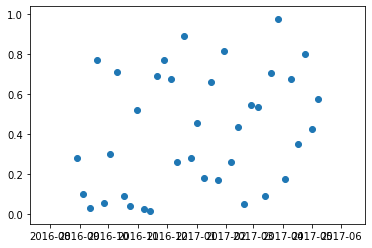

In [19]:
w2w = weeks[1:]
plt.scatter(w2w, pvals)

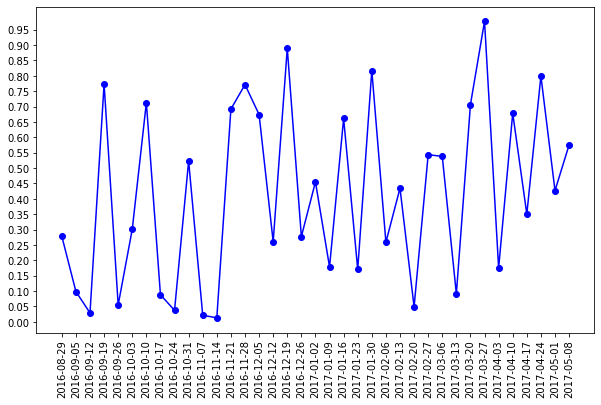

In [20]:
plt.figure(figsize=(10,6));
myplot = plt.plot(w2w, pvals, marker='o', color='blue')
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.xticks(w2w);
plt.show()

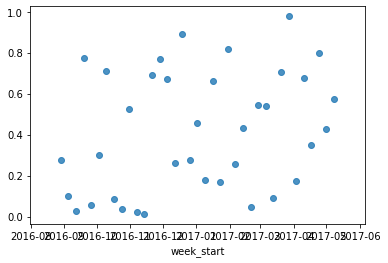

In [21]:
# Add a column: the color depends of x and y values, but you can use whatever function.
#value=(df['x']>0.2) & (df['y']>0.4)
#df['color']= np.where( value==True , "#9b59b6", "#3498db")
# plot
sns.regplot(w2w, pvals, fit_reg=False, marker='o')
            #, scatter_kws={'facecolors':df['color']})
#sns.plt.show()


In [22]:
w2w

DatetimeIndex(['2016-08-29', '2016-09-05', '2016-09-12', '2016-09-19',
               '2016-09-26', '2016-10-03', '2016-10-10', '2016-10-17',
               '2016-10-24', '2016-10-31', '2016-11-07', '2016-11-14',
               '2016-11-21', '2016-11-28', '2016-12-05', '2016-12-12',
               '2016-12-19', '2016-12-26', '2017-01-02', '2017-01-09',
               '2017-01-16', '2017-01-23', '2017-01-30', '2017-02-06',
               '2017-02-13', '2017-02-20', '2017-02-27', '2017-03-06',
               '2017-03-13', '2017-03-20', '2017-03-27', '2017-04-03',
               '2017-04-10', '2017-04-17', '2017-04-24', '2017-05-01',
               '2017-05-08'],
              dtype='datetime64[ns]', name='week_start', freq=None)

In [23]:
types = ['2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Back from Break'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
        ]


In [24]:
w = w2w.map(lambda x: str(x)[0:10])

In [25]:
df_type = pd.DataFrame([w, types])
df_type

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,2016-08-29,2016-09-05,2016-09-12,2016-09-19,2016-09-26,2016-10-03,2016-10-10,2016-10-17,2016-10-24,2016-10-31,...,2017-03-06,2017-03-13,2017-03-20,2017-03-27,2017-04-03,2017-04-10,2017-04-17,2017-04-24,2017-05-01,2017-05-08
1,2nd Week Back,Normal,Normal,Normal,Normal,Pre-Exams,Exams,Break,Back from Break,2nd Week Back,...,Exams,Break,Back from Break,2nd Week Back,Normal,Normal,Back from Break,Normal,Pre-Exams,Exams


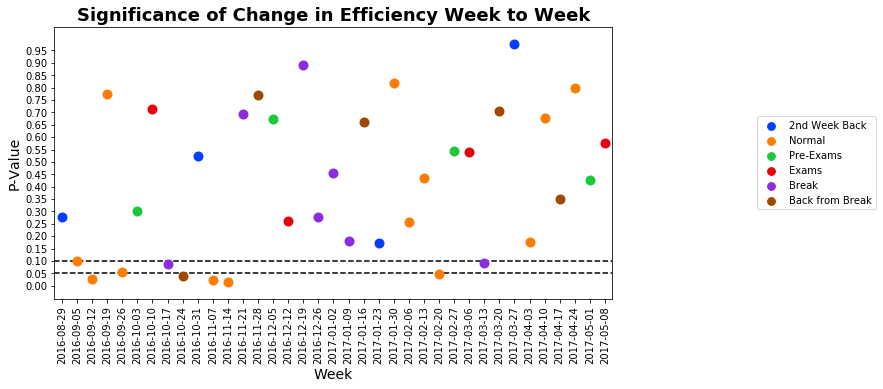

In [26]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=w, y=pvals, hue=types, size = 10, palette= 'bright');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y=.1, xmin=0, xmax=1, color='black', linestyle='--');
plt.axhline(y=.05, xmin=0, xmax=1, color='black', linestyle='--');
plt.xlabel('Week', fontsize=14);
plt.ylabel('P-Value', fontsize=14);
plt.title('Significance of Change in Efficiency Week to Week', fontsize=18, fontweight='bold');

In [38]:
len(types)

37

In [30]:
def compareMean(weekData, pvals):
    tset, pval = ttest_1samp(weekData, pd_flat.mean().mean())
    pvals.append(pval)
    print(pval)
    if pval < 0.10:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    #else:
        #print("we are accepting null hypothesis")

In [35]:
weeks = pdrop.columns
pvals = []
for w in weeks:
    print(w)
    this_week = pd_flat[w]
    compareMean(this_week, pvals)

2016-08-22 00:00:00
0.4850554575282199
2016-08-29 00:00:00
0.7166463747267883
2016-09-05 00:00:00
0.17748764075240578
2016-09-12 00:00:00
0.8443585249633687
2016-09-19 00:00:00
0.7360521306497408
2016-09-26 00:00:00
0.26276702458987566
2016-10-03 00:00:00
0.5257380416300865
2016-10-10 00:00:00
0.7048389406995517
2016-10-17 00:00:00
0.3044996081111364
2016-10-24 00:00:00
0.5232240618228862
2016-10-31 00:00:00
0.4933478359343988
2016-11-07 00:00:00
0.03704864599886782
 we are rejecting null hypothesis
2016-11-14 00:00:00
0.6801573882569096
2016-11-21 00:00:00
0.9510225103747174
2016-11-28 00:00:00
0.8107394614696001
2016-12-05 00:00:00
0.7302716056010938
2016-12-12 00:00:00
0.628927237341981
2016-12-19 00:00:00
0.5264711295198639
2016-12-26 00:00:00
0.17774306976199925
2017-01-02 00:00:00
0.0529357455819345
 we are rejecting null hypothesis
2017-01-09 00:00:00
0.35196106802523286
2017-01-16 00:00:00
0.4370740701500768
2017-01-23 00:00:00
0.7982845477893314
2017-01-30 00:00:00
0.686646993

In [41]:
ww = [str(x)[0:10] for x in weeks]

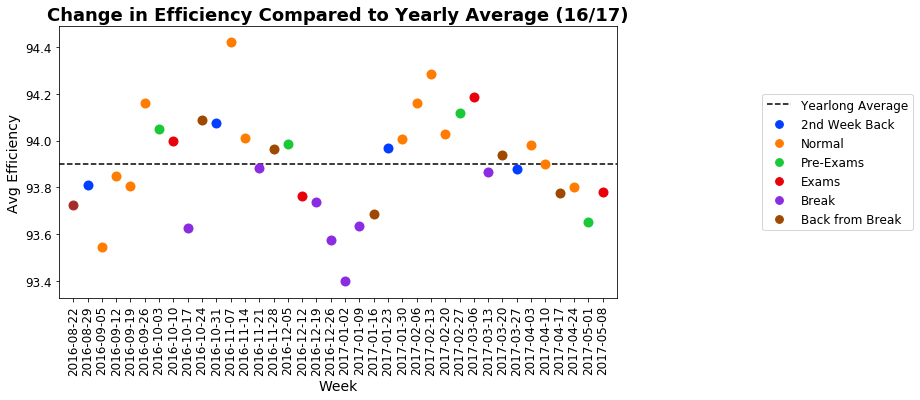

In [47]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=np.arange(1, 38), y=pd_flat.mean()[1:], hue=types, size = 10, palette= 'bright');

plt.xlim(-2, 37);
plt.scatter(-1, pd_flat.mean()[0], marker='o', s=80, color='brown');
plt.xticks(range(-1, len(ww)-1),ww, fontsize=12);
plt.xticks(rotation=90);
plt.yticks(fontsize=12);
#plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y= pd_flat.mean().mean(), xmin=0, xmax=1, color='black', linestyle='--', label="Yearlong Average");
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=12);
plt.xlabel('Week', fontsize=14);
plt.ylabel('Avg Efficiency', fontsize=14);
plt.title('Change in Efficiency Compared to Yearly Average (16/17)', fontsize=18, fontweight='bold');
plt.savefig('Figure5b', dpi=300, bbox_inches="tight")